In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import glob
import numpy as np
from imutils import contours

In [ ]:
!pip install ultralytics
!pip install roboflow
from ultralytics import YOLO
from roboflow import Roboflow

rf = Roboflow(api_key="9M9eZwZT2EXz4Lmw2SsQ")
project = rf.workspace("utad-dqdey").project("grapevine-disease-detection")
dataset = project.version(1).download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.4/709.4 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninsta

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Grapevine-disease-detection-1 in yolov5pytorch:: 100%|██████████| 340/340 [00:00<00:00, 5072.81it/s]


In [ ]:
model = YOLO("yolov5n.yaml").load("yolov5n.pt")

path = r"/content/Grapevine-disease-detection-1/data.yaml"

results = model.train(data = path, epochs = 100)

PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

Transferred 427/427 items from pretrained weights
Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov5n.yaml, data=/content/Grapevine-disease-detection-1/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, con

100%|██████████| 6.23M/6.23M [00:00<00:00, 100MB/s]


AMP: checks passed ✅


train: Scanning /content/Grapevine-disease-detection-1/train/labels... 144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 144/144 [00:00<00:00, 1309.80it/s]

train: New cache created: /content/Grapevine-disease-detection-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Grapevine-disease-detection-1/valid/labels... 13 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13/13 [00:00<00:00, 582.85it/s]

val: New cache created: /content/Grapevine-disease-detection-1/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.97G      3.203      4.493      2.226       1685        640: 100%|██████████| 9/9 [00:11<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:14<00:00, 14.86s/it]


                   all         13       1077    0.00016    0.00136   8.04e-05   2.41e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.94G      2.977      4.311      1.923       1759        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         13       1077    0.00016    0.00136   8.04e-05   2.41e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       4.8G      2.893      3.974      1.735       1358        640: 100%|██████████| 9/9 [00:04<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         13       1077     0.0117     0.0315    0.00878    0.00296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.74G      2.807       3.63      1.619       1934        640: 100%|██████████| 9/9 [00:05<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         13       1077     0.0305      0.118     0.0347     0.0121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.16G      2.754      3.304      1.564       1450        640: 100%|██████████| 9/9 [00:04<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all         13       1077      0.694     0.0605     0.0422     0.0161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.52G      2.786      3.091      1.561       1503        640: 100%|██████████| 9/9 [00:04<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         13       1077     0.0477      0.129     0.0568     0.0232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       5.3G      2.778      2.955      1.546       1644        640: 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

                   all         13       1077      0.704     0.0817     0.0582     0.0201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.48G      2.772        2.8      1.537       1514        640: 100%|██████████| 9/9 [00:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         13       1077      0.708      0.118     0.0824     0.0309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.01G      2.786      2.638        1.5       2380        640: 100%|██████████| 9/9 [00:04<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         13       1077      0.493      0.163     0.0843     0.0311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.01G      2.764       2.63      1.513       1897        640: 100%|██████████| 9/9 [00:04<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

                   all         13       1077      0.071      0.164     0.0702     0.0275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.95G      2.716      2.517      1.526       2077        640: 100%|██████████| 9/9 [00:04<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all         13       1077     0.0525       0.15     0.0665     0.0265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.79G      2.713      2.485      1.519       1788        640: 100%|██████████| 9/9 [00:05<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all         13       1077     0.0887      0.174     0.0966     0.0376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       3.9G      2.703      2.403      1.502       1797        640: 100%|██████████| 9/9 [00:04<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         13       1077      0.316       0.18      0.117      0.051



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.65G      2.664      2.395      1.485       1395        640: 100%|██████████| 9/9 [00:04<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         13       1077      0.563      0.141      0.126     0.0524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       4.8G      2.669      2.354      1.508       1408        640: 100%|██████████| 9/9 [00:04<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         13       1077      0.556      0.143      0.127     0.0517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.93G      2.656      2.302      1.522       1567        640: 100%|██████████| 9/9 [00:04<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         13       1077      0.529       0.15      0.117     0.0481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.61G      2.567      2.315      1.493       1442        640: 100%|██████████| 9/9 [00:04<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         13       1077      0.384      0.146      0.123     0.0529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.88G        2.6      2.288      1.506       1328        640: 100%|██████████| 9/9 [00:03<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         13       1077      0.377      0.135       0.12      0.052



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       4.3G      2.611      2.277      1.525       1523        640: 100%|██████████| 9/9 [00:04<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all         13       1077      0.134       0.13     0.0946     0.0385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.45G      2.557       2.22      1.514       1233        640: 100%|██████████| 9/9 [00:04<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         13       1077      0.374      0.133      0.118     0.0513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.64G      2.585       2.15      1.508       1369        640: 100%|██████████| 9/9 [00:04<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         13       1077      0.363      0.154      0.123     0.0519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.72G      2.567      2.179      1.484       1303        640: 100%|██████████| 9/9 [00:05<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         13       1077      0.357      0.152      0.116     0.0495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.02G      2.538      2.159      1.476       1569        640: 100%|██████████| 9/9 [00:03<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         13       1077      0.381      0.163      0.125     0.0552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.79G      2.561      2.072      1.438       1893        640: 100%|██████████| 9/9 [00:04<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         13       1077      0.555      0.152       0.13     0.0536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.33G      2.512       2.09      1.449       1661        640: 100%|██████████| 9/9 [00:04<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         13       1077       0.72      0.142      0.133     0.0559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.94G      2.542        2.1      1.481       1816        640: 100%|██████████| 9/9 [00:05<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         13       1077      0.613      0.124      0.127     0.0537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.77G      2.502      2.081      1.469       1265        640: 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         13       1077      0.394      0.125      0.123     0.0507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       4.1G      2.508       2.02      1.435       1738        640: 100%|██████████| 9/9 [00:04<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         13       1077       0.37      0.145       0.12     0.0501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.74G      2.517      2.011      1.459       1038        640: 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         13       1077      0.185       0.16       0.14       0.06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.87G      2.465      1.997      1.424       1574        640: 100%|██████████| 9/9 [00:03<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

                   all         13       1077      0.192      0.144       0.14     0.0628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.24G      2.427      1.985      1.435       1292        640: 100%|██████████| 9/9 [00:05<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         13       1077      0.207      0.164      0.151     0.0684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.07G      2.474      1.987      1.457       1208        640: 100%|██████████| 9/9 [00:03<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         13       1077      0.217      0.172      0.156     0.0688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.97G      2.488      1.962      1.465       1708        640: 100%|██████████| 9/9 [00:05<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         13       1077      0.225      0.172      0.159     0.0713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.99G      2.408      1.943      1.442       1469        640: 100%|██████████| 9/9 [00:03<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         13       1077      0.209      0.172      0.156     0.0676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.38G      2.405      1.941      1.432       1545        640: 100%|██████████| 9/9 [00:05<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all         13       1077      0.195      0.172      0.147      0.063



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100         4G      2.428      1.924      1.422       1409        640: 100%|██████████| 9/9 [00:04<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         13       1077      0.184      0.148      0.135     0.0592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.18G      2.402        1.9      1.441       1098        640: 100%|██████████| 9/9 [00:04<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         13       1077      0.195      0.154      0.152     0.0674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.38G      2.434       1.88      1.439       1289        640: 100%|██████████| 9/9 [00:04<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         13       1077      0.186      0.176      0.163     0.0732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.82G      2.413      1.874      1.448       1492        640: 100%|██████████| 9/9 [00:04<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         13       1077      0.205      0.162      0.157     0.0712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.62G      2.439      1.879      1.458       1414        640: 100%|██████████| 9/9 [00:04<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         13       1077      0.189       0.17       0.16     0.0708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.43G      2.393      1.867      1.411       2474        640: 100%|██████████| 9/9 [00:05<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all         13       1077      0.372      0.132       0.13     0.0509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.54G      2.452      1.889      1.461       1802        640: 100%|██████████| 9/9 [00:04<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         13       1077      0.374       0.14      0.133     0.0554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.09G       2.45      1.878      1.462       1333        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         13       1077      0.186      0.195      0.164     0.0739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.17G      2.381      1.862      1.445       2042        640: 100%|██████████| 9/9 [00:04<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         13       1077      0.397      0.165      0.168     0.0738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.83G      2.401      1.852      1.436       1907        640: 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         13       1077      0.406      0.152      0.145      0.059



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.33G       2.43      1.844      1.434       1508        640: 100%|██████████| 9/9 [00:04<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         13       1077      0.193      0.185      0.157     0.0713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.03G      2.368      1.844      1.442       1623        640: 100%|██████████| 9/9 [00:04<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         13       1077      0.198      0.187      0.155     0.0664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.11G       2.35      1.814      1.431       1191        640: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         13       1077      0.188      0.185      0.163     0.0747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.74G      2.373      1.811      1.415       1481        640: 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         13       1077      0.214      0.165      0.157     0.0691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       4.4G      2.362      1.817      1.424       1493        640: 100%|██████████| 9/9 [00:05<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         13       1077      0.204       0.19       0.17     0.0793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.44G      2.353      1.814      1.431       1807        640: 100%|██████████| 9/9 [00:05<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         13       1077      0.202      0.178      0.179     0.0833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.61G      2.353      1.821      1.427        981        640: 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         13       1077       0.42       0.18      0.181     0.0824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.56G      2.342      1.783      1.404       1155        640: 100%|██████████| 9/9 [00:05<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         13       1077      0.431      0.182      0.184     0.0841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.18G      2.296      1.759      1.383       1504        640: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         13       1077      0.427      0.181      0.176     0.0794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.67G      2.343      1.793      1.417       1490        640: 100%|██████████| 9/9 [00:05<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         13       1077      0.408      0.188      0.175     0.0798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.48G      2.328      1.759      1.405       2066        640: 100%|██████████| 9/9 [00:04<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         13       1077      0.438      0.161      0.221     0.0898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.18G      2.317      1.776      1.405       1352        640: 100%|██████████| 9/9 [00:05<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         13       1077      0.416      0.154      0.185     0.0659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.57G       2.31       1.74      1.407       1371        640: 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         13       1077      0.378      0.177      0.187      0.068



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.05G      2.385      1.808      1.414       1501        640: 100%|██████████| 9/9 [00:05<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         13       1077      0.382      0.159      0.158     0.0554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.91G      2.355      1.771      1.414       1186        640: 100%|██████████| 9/9 [00:04<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         13       1077      0.393      0.163       0.19     0.0783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.89G      2.313      1.764      1.404       1599        640: 100%|██████████| 9/9 [00:05<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all         13       1077      0.276      0.234      0.204      0.092



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.01G      2.328      1.765      1.428       1388        640: 100%|██████████| 9/9 [00:03<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         13       1077      0.231      0.202      0.172      0.079



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.93G      2.328      1.772      1.406       1648        640: 100%|██████████| 9/9 [00:05<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         13       1077      0.195      0.175      0.164     0.0755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.32G      2.369      1.783      1.417       1600        640: 100%|██████████| 9/9 [00:04<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         13       1077      0.404      0.173      0.186     0.0774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       5.5G      2.321      1.765      1.392       1612        640: 100%|██████████| 9/9 [00:05<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         13       1077      0.241      0.203      0.194     0.0829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.71G      2.228      1.723      1.369       1853        640: 100%|██████████| 9/9 [00:03<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         13       1077      0.225      0.241        0.2     0.0871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.96G      2.272      1.725      1.383       1909        640: 100%|██████████| 9/9 [00:05<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         13       1077       0.23      0.235      0.179     0.0828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      5.14G      2.343      1.749      1.409       1121        640: 100%|██████████| 9/9 [00:04<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         13       1077      0.254      0.205      0.175      0.074



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.23G      2.315      1.688      1.404       1466        640: 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         13       1077      0.247      0.229      0.191     0.0832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.58G      2.298      1.711      1.373       1438        640: 100%|██████████| 9/9 [00:07<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         13       1077      0.286      0.219      0.196     0.0876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       4.4G      2.257      1.735      1.387       1386        640: 100%|██████████| 9/9 [00:03<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         13       1077      0.471      0.204      0.192     0.0866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.83G      2.268      1.723       1.38       1451        640: 100%|██████████| 9/9 [00:06<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         13       1077      0.447       0.19      0.177     0.0774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       5.4G      2.266      1.673      1.366       1666        640: 100%|██████████| 9/9 [00:04<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         13       1077      0.428      0.192      0.172     0.0738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.19G      2.255      1.673      1.375       1134        640: 100%|██████████| 9/9 [00:06<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         13       1077      0.451      0.172      0.176     0.0775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.69G      2.263       1.67      1.373       1689        640: 100%|██████████| 9/9 [00:04<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         13       1077       0.44      0.167      0.179     0.0757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       5.1G      2.275       1.71      1.377       1902        640: 100%|██████████| 9/9 [00:05<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         13       1077      0.394      0.186       0.18     0.0775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.47G       2.31      1.703      1.408       1263        640: 100%|██████████| 9/9 [00:04<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         13       1077      0.411      0.184      0.186      0.085



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.44G      2.238      1.622      1.373       1789        640: 100%|██████████| 9/9 [00:05<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         13       1077      0.409      0.189      0.192     0.0862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.94G      2.219      1.646      1.384       1663        640: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         13       1077      0.385      0.205      0.175     0.0777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.87G      2.275      1.651      1.369       1515        640: 100%|██████████| 9/9 [00:05<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         13       1077      0.387      0.195      0.162     0.0686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      5.09G      2.274      1.657      1.351       1924        640: 100%|██████████| 9/9 [00:04<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         13       1077      0.413      0.188      0.161     0.0705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.64G      2.227      1.653      1.353       2058        640: 100%|██████████| 9/9 [00:04<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         13       1077      0.466      0.188      0.178     0.0808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      5.15G      2.201      1.626      1.353       1908        640: 100%|██████████| 9/9 [00:05<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         13       1077      0.491      0.198      0.193     0.0866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.63G      2.239       1.67      1.395       1467        640: 100%|██████████| 9/9 [00:04<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         13       1077      0.279      0.215      0.211     0.0935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      5.09G      2.165      1.609      1.362       1556        640: 100%|██████████| 9/9 [00:04<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         13       1077      0.278      0.236      0.213     0.0942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.56G      2.219      1.659      1.391       1307        640: 100%|██████████| 9/9 [00:04<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

                   all         13       1077      0.284      0.216       0.21     0.0919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.74G      2.218      1.633      1.374       1458        640: 100%|██████████| 9/9 [00:05<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         13       1077      0.288      0.217      0.215      0.096



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       4.8G      2.206      1.632      1.371       1306        640: 100%|██████████| 9/9 [00:04<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         13       1077      0.265      0.251      0.223     0.0963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.68G      2.221      1.608      1.353       1565        640: 100%|██████████| 9/9 [00:05<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         13       1077      0.563      0.197       0.22     0.0929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.13G       2.18      1.601      1.334       1785        640: 100%|██████████| 9/9 [00:04<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         13       1077      0.538      0.199      0.212     0.0881


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.19G      2.291       1.73      1.415       1148        640: 100%|██████████| 9/9 [00:14<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.53s/it]


                   all         13       1077      0.519      0.194      0.205     0.0856

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.34G      2.248      1.691      1.389       1197        640: 100%|██████████| 9/9 [00:09<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         13       1077      0.446      0.214      0.202     0.0879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.17G      2.184      1.648      1.389       1117        640: 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         13       1077      0.466      0.229      0.196     0.0876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.85G      2.154      1.653      1.381       1166        640: 100%|██████████| 9/9 [00:04<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         13       1077      0.482      0.224      0.202     0.0912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.88G      2.179      1.665      1.405       1006        640: 100%|██████████| 9/9 [00:03<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all         13       1077      0.461       0.24      0.205     0.0926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.55G       2.22      1.673      1.419       1127        640: 100%|██████████| 9/9 [00:03<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         13       1077      0.464      0.231      0.207     0.0946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.95G      2.177      1.638      1.409        880        640: 100%|██████████| 9/9 [00:05<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         13       1077      0.458      0.223      0.202     0.0926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.24G      2.146      1.641      1.392       1249        640: 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         13       1077       0.46      0.216      0.204     0.0932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.16G       2.12      1.615      1.372       1233        640: 100%|██████████| 9/9 [00:03<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         13       1077      0.462      0.209      0.197     0.0889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.28G      2.142      1.623      1.374       1087        640: 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         13       1077       0.45       0.21      0.194     0.0859



100 epochs completed in 0.196 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5n summary (fused): 193 layers, 2504114 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]


                   all         13       1077      0.275      0.253      0.224     0.0969
             ESCA leaf         13         39      0.574      0.139      0.246     0.0969
               FD leaf         13        249      0.328       0.57      0.443      0.197
      confounding leaf         13        621      0.343      0.452      0.347      0.161
     symptomatic bunch         13         21          0          0      0.021    0.00843
     symptomatic shoot         13        147       0.13      0.102     0.0612     0.0208
Speed: 0.8ms preprocess, 2.9ms inference, 0.0ms loss, 10.9ms postprocess per image
Results saved to runs/detect/train2



image 1/7 /content/Grapevine-disease-detection-1/test/images/im_00003_jpg.rf.5adc5bc6bb62625a7bc3ed1c5195c3da.jpg: 640x640 5 confounding leafs, 28.6ms
image 2/7 /content/Grapevine-disease-detection-1/test/images/im_00012_jpg.rf.27e49373a42d1c7c3678f240ab8c7159.jpg: 640x640 6 confounding leafs, 25.9ms
image 3/7 /content/Grapevine-disease-detection-1/test/images/im_00013-2-_jpg.rf.9c4ee129ef9df2b7aee15e5df5cc6af9.jpg: 640x640 11 FD leafs, 6 confounding leafs, 9.1ms
image 4/7 /content/Grapevine-disease-detection-1/test/images/im_00031-2-_jpg.rf.6db8591b88ce2c26724e7841e83ad4a6.jpg: 640x640 2 FD leafs, 2 confounding leafs, 9.9ms
image 5/7 /content/Grapevine-disease-detection-1/test/images/im_00058_jpg.rf.b934925fbd66f4e3af6f8cbb70be4f5c.jpg: 640x640 12 FD leafs, 2 confounding leafs, 9.2ms
image 6/7 /content/Grapevine-disease-detection-1/test/images/im_00089_jpg.rf.7755c4e3e04ba1c47144f92657b03a00.jpg: 640x640 8 FD leafs, 8 confounding leafs, 9.5ms
image 7/7 /content/Grapevine-disease-dete

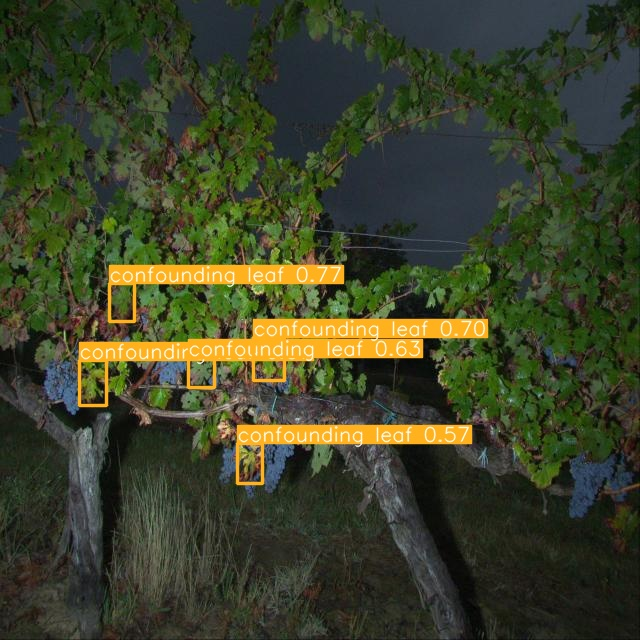

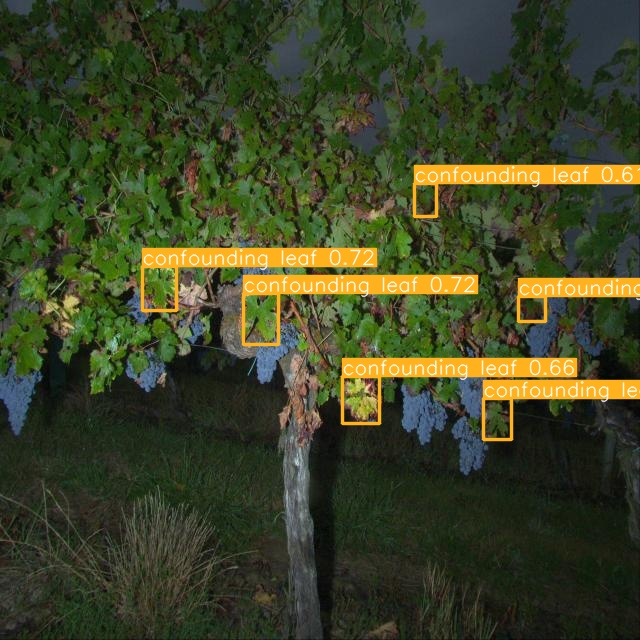

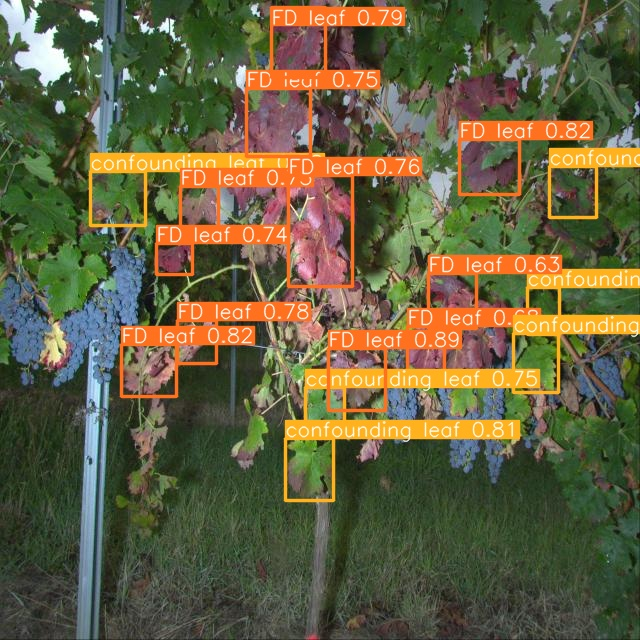

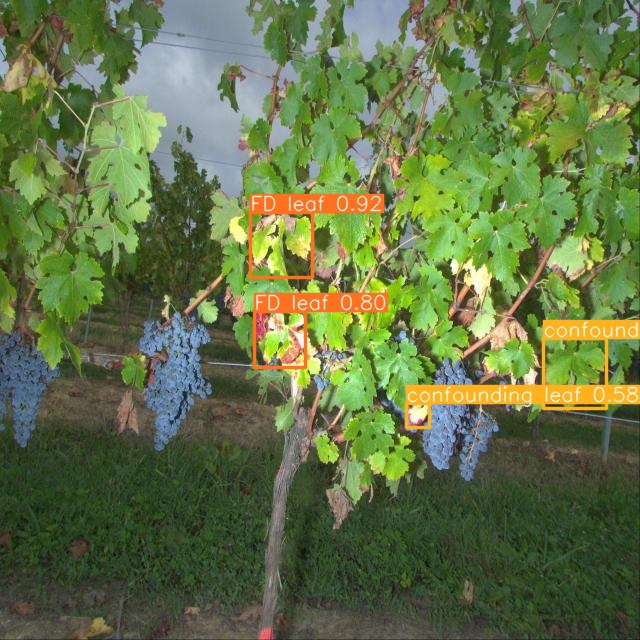

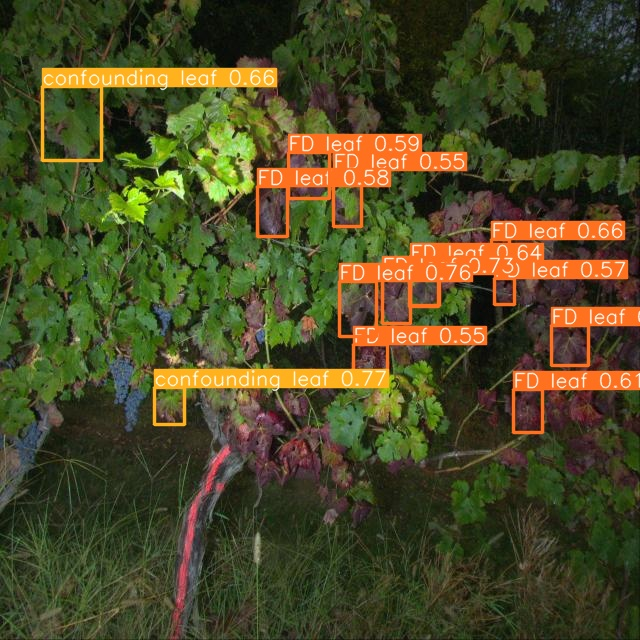

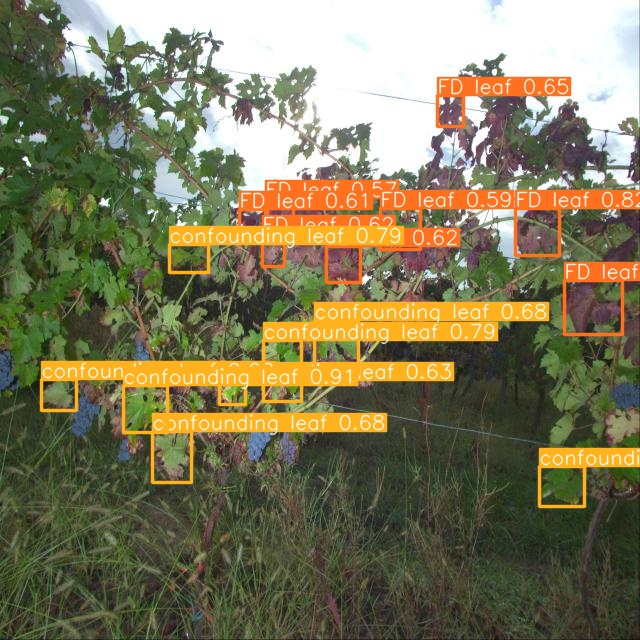

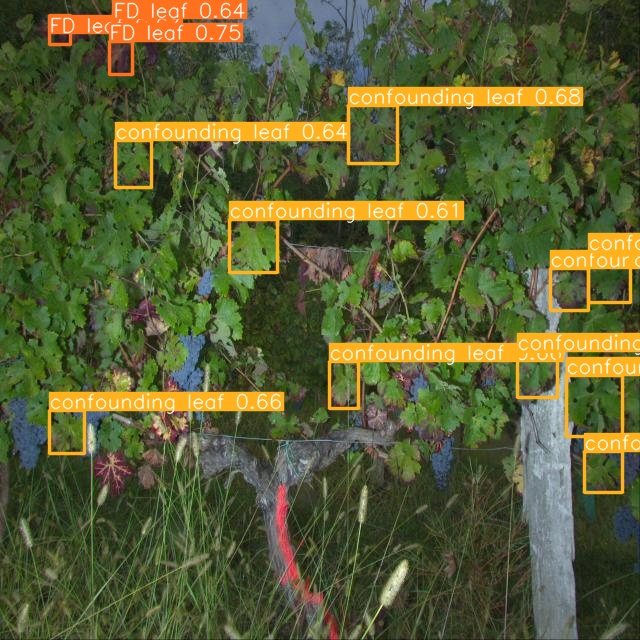

In [ ]:
model_best = YOLO("/content/dl_yolov5n_best.pt")
dir_test_images = "/content/Grapevine-disease-detection-1/test/images"
test = model_best.predict(source = dir_test_images, conf = 0.55, save = True, save_txt = True)

dir_predicted_images = "/content/runs/detect/predict/*.jpg"
tested_images_paths = []

for image in sorted(glob.iglob(dir_predicted_images)):
  tested_images_paths.append(image)

for image in tested_images_paths:
  img = cv2.imread(image)
  cv2_imshow(img)

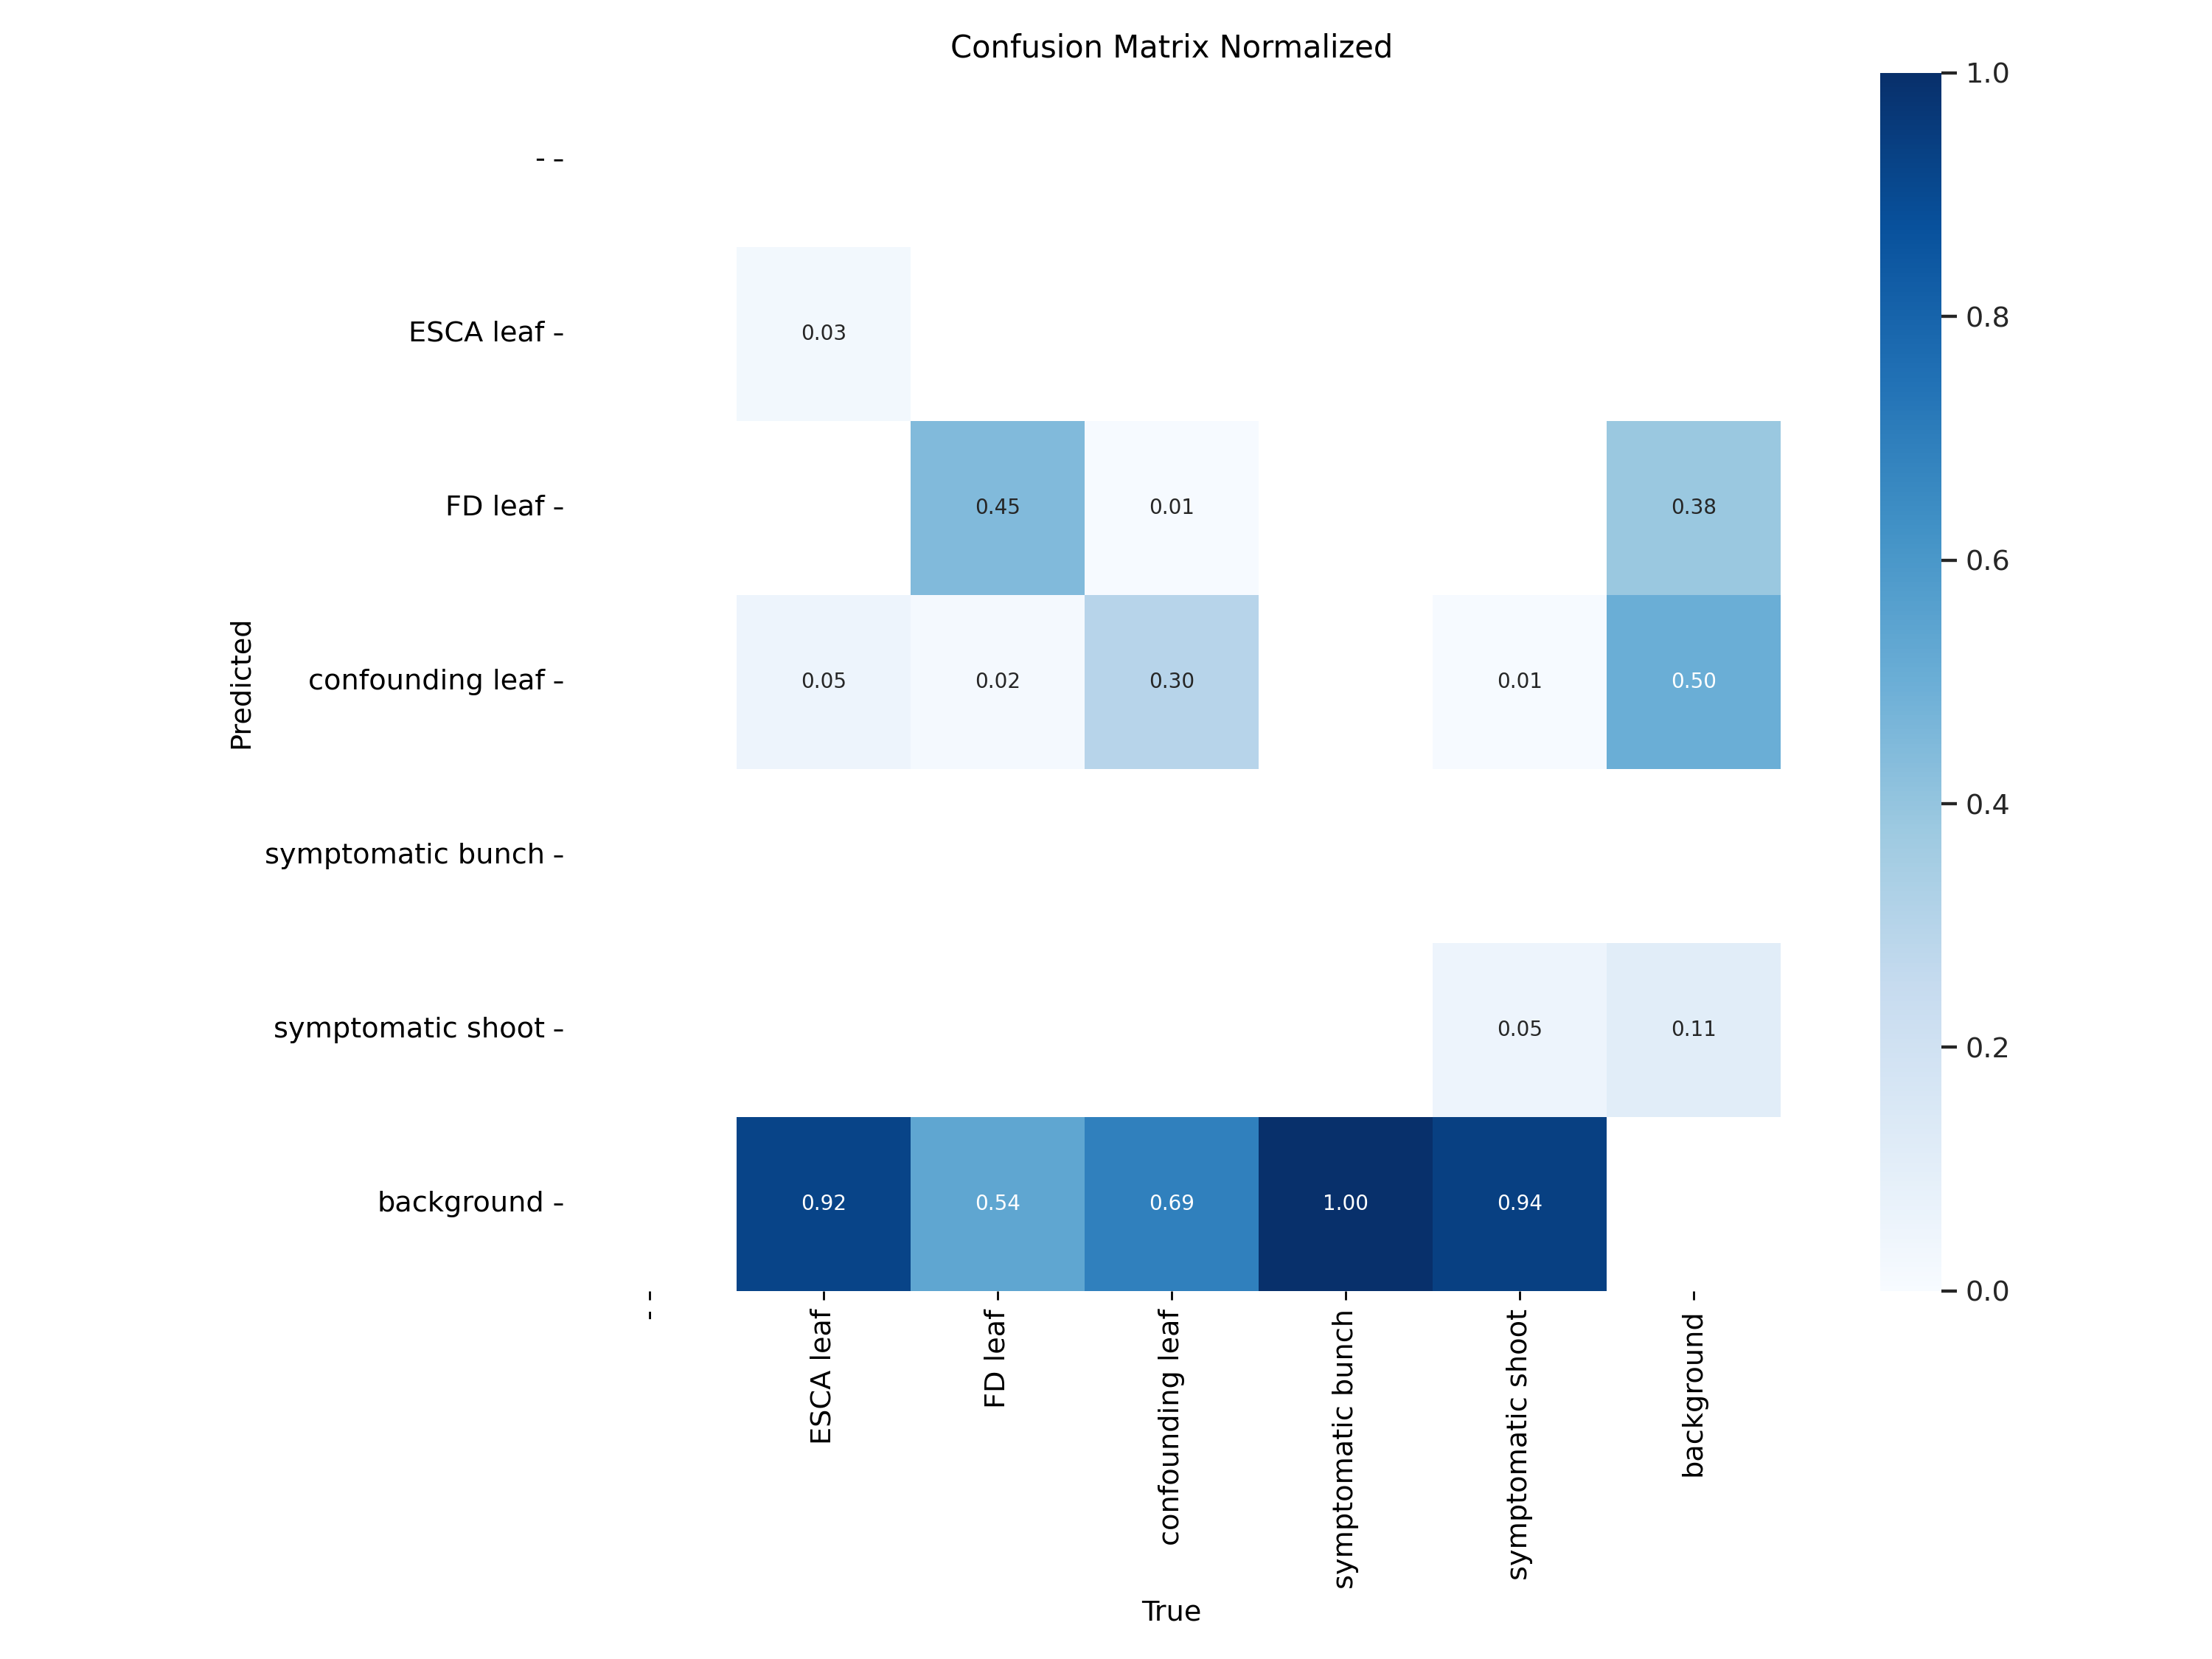

In [ ]:
confusion_matrix_img = cv2.imread("/content/runs/detect/train2/confusion_matrix_normalized.png", cv2.COLOR_BGR2RGB)
cv2_imshow(confusion_matrix_img)

In [ ]:
from matplotlib import pyplot as plot

thresholds = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
threshold = 0.5
count_list = []

for threshold in thresholds:

  results = model_best("/content/Grapevine-disease-detection-1/test/images/im_00013-2-_jpg.rf.9c4ee129ef9df2b7aee15e5df5cc6af9.jpg", conf = threshold)
  class_names = ["-", "ESCA", "FD", "conf leaf", "syntomatic bunch", "syntomatic shoot"]

  for result in results:
    count = 0
    num_box = result.boxes
    cls = num_box.cls.tolist()

    print(cls)
    for class_index in cls:
        class_name = class_names[int(class_index)]
        print("Class:", class_name)
        if class_name == "FD":
          count = count + 1
    print("Number of FD:", count)
    count_list.append(count)

count_list



image 1/1 /content/Grapevine-disease-detection-1/test/images/im_00013-2-_jpg.rf.9c4ee129ef9df2b7aee15e5df5cc6af9.jpg: 640x640 13 FD leafs, 7 confounding leafs, 14.8ms
Speed: 2.2ms preprocess, 14.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
7 labels saved to runs/detect/predict/labels
[2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0]
Class: FD
Class: FD
Class: FD
Class: conf leaf
Class: FD
Class: FD
Class: FD
Class: conf leaf
Class: FD
Class: conf leaf
Class: FD
Class: FD
Class: FD
Class: FD
Class: conf leaf
Class: conf leaf
Class: conf leaf
Class: conf leaf
Class: FD
Class: FD
Number of FD: 13

image 1/1 /content/Grapevine-disease-detection-1/test/images/im_00013-2-_jpg.rf.9c4ee129ef9df2b7aee15e5df5cc6af9.jpg: 640x640 11 FD leafs, 6 confounding leafs, 17.7ms
Speed: 1.7ms preprocess, 17.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs

[13, 11, 11, 10, 9, 7, 3, 1, 0, 0]

Text(0, 0.5, 'Number of FD leaves detected')

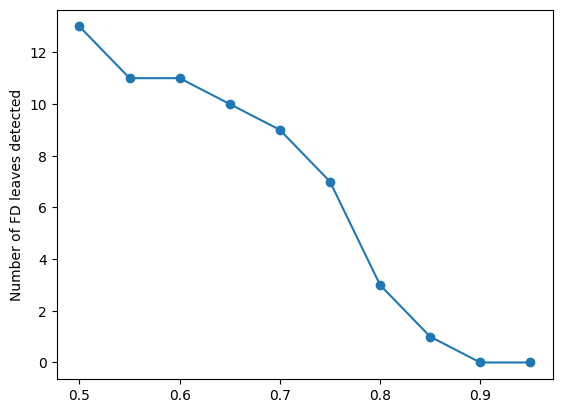

In [ ]:
plot.plot(thresholds, count_list, marker='o')

plot.ylabel("Number of FD leaves detected")

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!yolo task=detect mode=val split=test model="/content/dl_yolov5n_best.pt" data="/content/Grapevine-disease-detection-1/data.yaml"


Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5n summary (fused): 193 layers, 2504114 parameters, 0 gradients, 7.1 GFLOPs
val: Scanning /content/Grapevine-disease-detection-1/test/labels... 7 images, 0 backgrounds, 0 corrupt: 100% 7/7 [00:00<00:00, 912.32it/s]
val: New cache created: /content/Grapevine-disease-detection-1/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.15it/s]
                   all          7        575      0.568       0.24      0.257      0.135
             ESCA leaf          7          3       0.67      0.333      0.344      0.275
               FD leaf          7        162      0.468      0.494      0.436      0.199
      confounding leaf          7        313      0.525      0.329      0.372      0.168
     symptomatic bunch          7         16          1          0     0.0859     0.0188
     symptomatic shoot          7         81

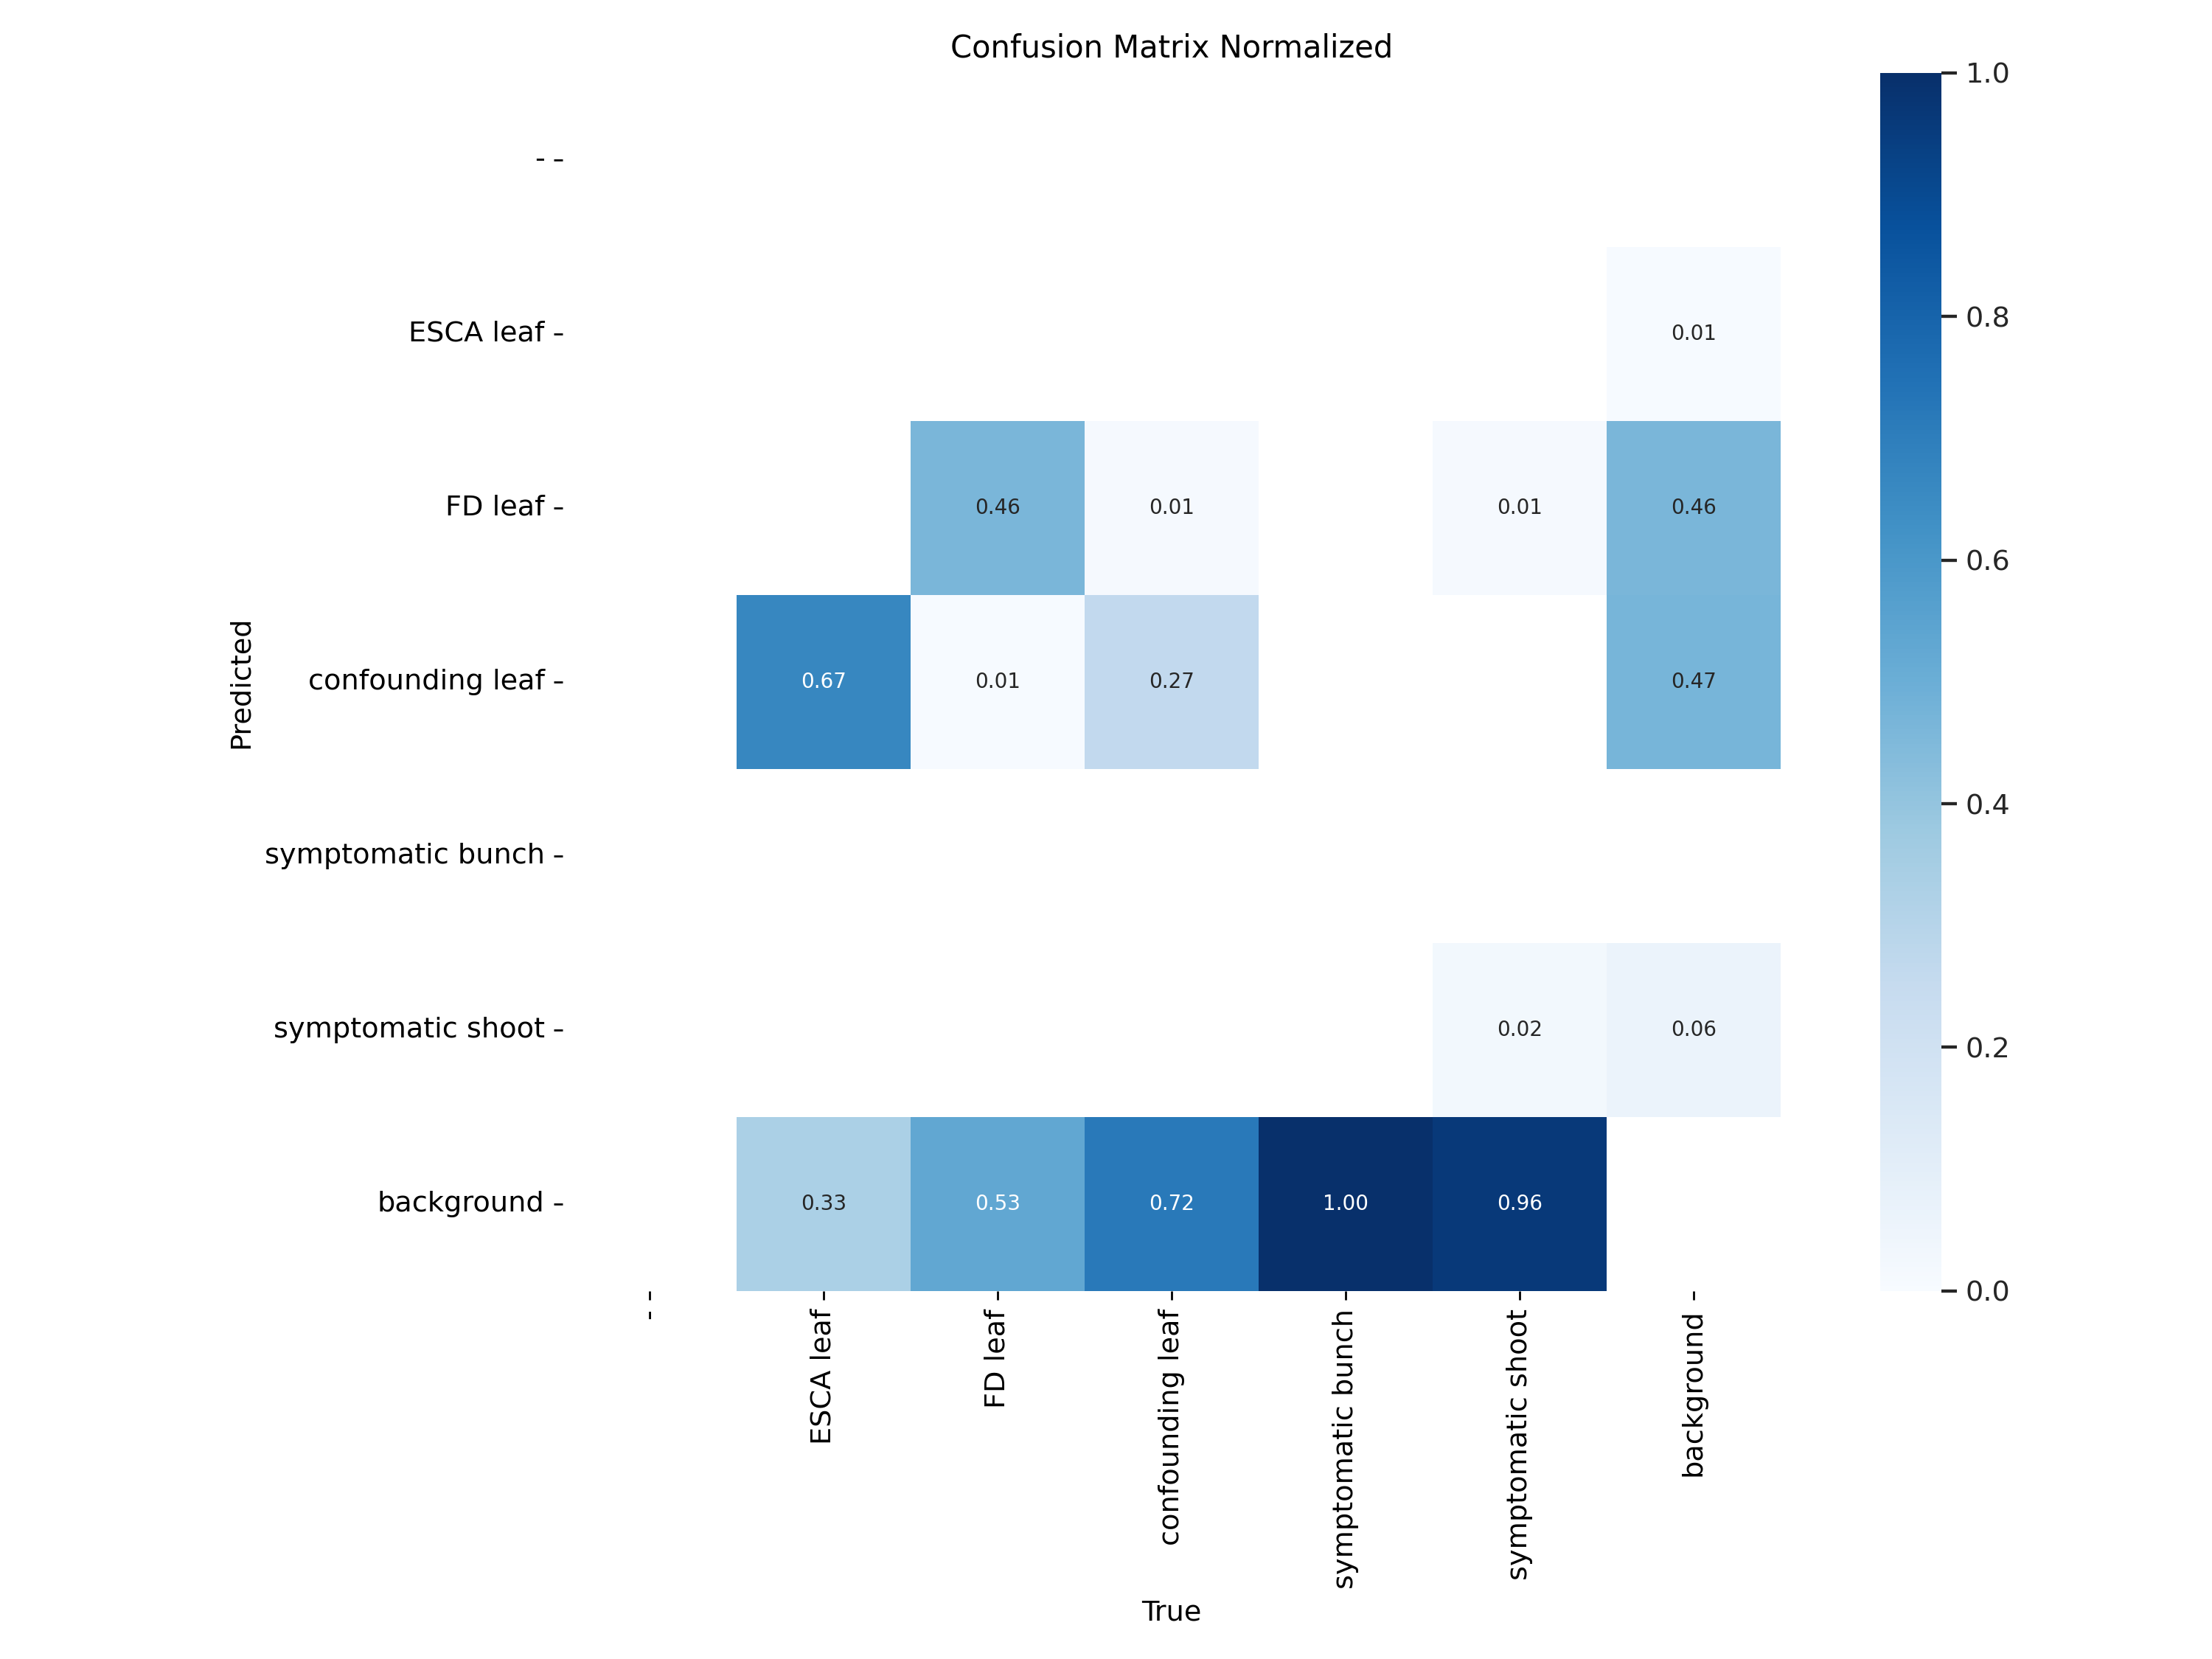

In [ ]:
confusion_matrix_img = cv2.imread("/content/runs/detect/val/confusion_matrix_normalized.png", cv2.COLOR_BGR2RGB)
cv2_imshow(confusion_matrix_img)